In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sigma = 90

def Acos(R, theta, miu, nu):
    part1 = np.cos(miu*theta*np.pi/180)*(R/sigma)**miu
    part2 = P(miu,nu,R**2/sigma**2)
    part3 = np.exp(-R**2/(4*sigma**2))
    return part1*part2*part3

def Asin(R, theta, miu, nu):
    part1 = np.sin(miu*theta*np.pi/180)*(R/sigma)**miu
    part2 = P(miu,nu,R**2/sigma**2)
    part3 = np.exp(-R**2/(4*sigma**2))
    return part1*part2*part3

def P(miu,nu,u):
    returnarray = np.ones([360,91])
    for i in range(360):
        for j in range(91):
            terms = []
            p = 0
            while p <= nu:
                up = np.math.factorial(miu + nu)*np.math.factorial(nu)
                down = np.math.factorial(miu + p)*np.math.factorial(p)*np.math.factorial(nu-p)
                term = (-2)**(nu-p)* up/down * u[i][j]**p
                terms.append(term)
                p += 1
            returnarray[i][j] = np.sum(terms)
    return returnarray

In [3]:
#Normalization
def normalize(array):
    q = 0
    theta = 0
    while theta <= 90:
        for i in range(360):
            q += (array[theta*360 + i])**2 * (np.pi/180)**2 * np.sin(theta*np.pi/180)
        theta += 1
    return array/q

In [4]:
theta = np.linspace(0, 90, 91)
phi = np.linspace(0, 359, 360)
xx, yy = np.meshgrid(theta, phi)

In [5]:
xx.shape

(360, 91)

In [304]:
def TDH(rank):
    """return matrix A = [f1, f2, f3, ...] for rank 0 to rank TDH functions"""
    zz00c = Acos(xx, yy, 0, 0)
    zz00c2d = zz00c.flatten()
    array = normalize(zz00c2d)
    r = 1
    while r <= rank:
        m = 0
        while m <= r:
            if (r - m)%2 == 0:
                n = (r - m)/2
                if m == 0:
                    cosine = Acos(xx,yy,m,n).T
                    cosine2d = cosine.flatten()
                    ncos = normalize(cosine2d)
                    array = np.vstack((array, ncos))
                    m += 2
                else:
                    cosine = Acos(xx,yy,m,n).T
                    cosine2d = cosine.flatten()
                    ncos = normalize(cosine2d)
                    sine = Asin(xx,yy,m,n).T
                    sine2d = sine.flatten()
                    nsin = normalize(sine2d)
                    array = np.vstack((array, ncos))
                    array = np.vstack((array, nsin))
                    m += 2
            else:
                m += 1
        r += 1
    matrix = np.matrix(array).T
    return matrix

In [305]:
def model(rank, coe):
    A = TDH(rank)
    a = np.matrix(coe).T
    return np.matmul(A,a)

In [306]:
def simulation(coe, sigma):
    rank = 0
    count = 1
    length = len(coe)
    while length > count:
        rank += 1
        count += rank + 1
    mo = model(rank,coe)
    noise = np.random.default_rng().normal(0.0, sigma*np.max(mo),360*91)
    noi = np.matrix(noise).T
    data = mo + noi
    return data

In [307]:
def solve(A, data):
    AT = A.T
    ATA = np.matmul(AT,A)
    ATAinverse = np.linalg.inv(ATA)
    half = np.matmul(ATAinverse,AT)
    x = np.matmul(half,data)
    return x

In [308]:
def residual(A,data):
    x = solve(A, data)
    AT = A.T
    fittingmodel = np.matmul(A, x)
    r = fittingmodel - data
    return r

In [6]:
def residual2D(A,data):
    x = solve(A, data)
    AT = A.T
    fittingmodel = np.matmul(A, x)
    r = fittingmodel - data
    r2D = r.reshape(360,91)
    return r2D

In [309]:
def covariance(A,data):
    AT = A.T
    ATA = np.matmul(AT,A)
    ATAinverse = np.linalg.inv(ATA)
    r = residual(A,data)
    rT = r.T
    rTr = np.matmul(rT,r)
    s = rTr/((len(data))-10)
    s2 = s.item(0)
    covariance = s2*ATAinverse
    return covariance

In [310]:
data = simulation(np.array([2,-3,1,4,2,6,3,1,-2,0]),0.1)

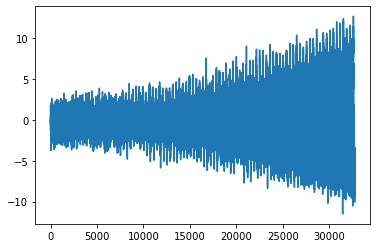

In [311]:
plt.plot(data)

In [312]:
A = TDH(3)

In [317]:
a = solve(A, data)

In [314]:
cova = covariance(A,data)

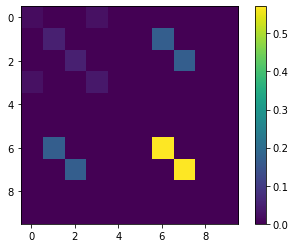

In [315]:
plt.imshow(cova)
plt.colorbar()

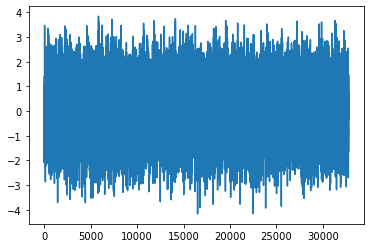

In [316]:
res = residual(A,data)
plt.plot(res)

In [327]:
alim = np.arange(10)
error = np.sqrt(np.diag(cova))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<ErrorbarContainer object of 3 artists>

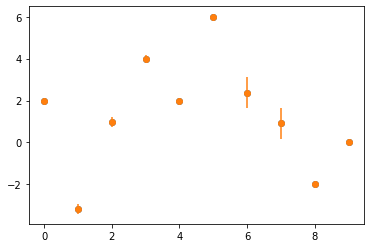

In [330]:
plt.plot(alim,a, "o")
plt.errorbar(alim, a, yerr = error, fmt = "o")

In [289]:
zz00c = Acos(xx, yy, 0, 0)
zz00c2d = zz00c.flatten()
array = normalize(zz00c2d)

<ipython-input-293-8348fe53cad6>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs.pcolormesh(yy*np.pi/180,xx,array.reshape([360,91]),cmap='coolwarm', label = "model")


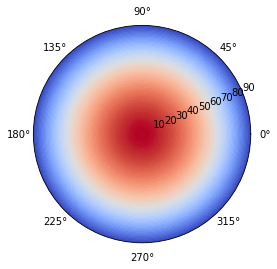

In [293]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(yy*np.pi/180,xx,array.reshape([360,91]),cmap='coolwarm', label = "model")